/tmp/ipykernel_52386/1482998293.py:17: RuntimeWarning: invalid value encountered in true_divide
  field = mu*self.charge*self.vel[2]*r/(4*np.pi*mod_r**3)


<IPython.core.display.Javascript object>


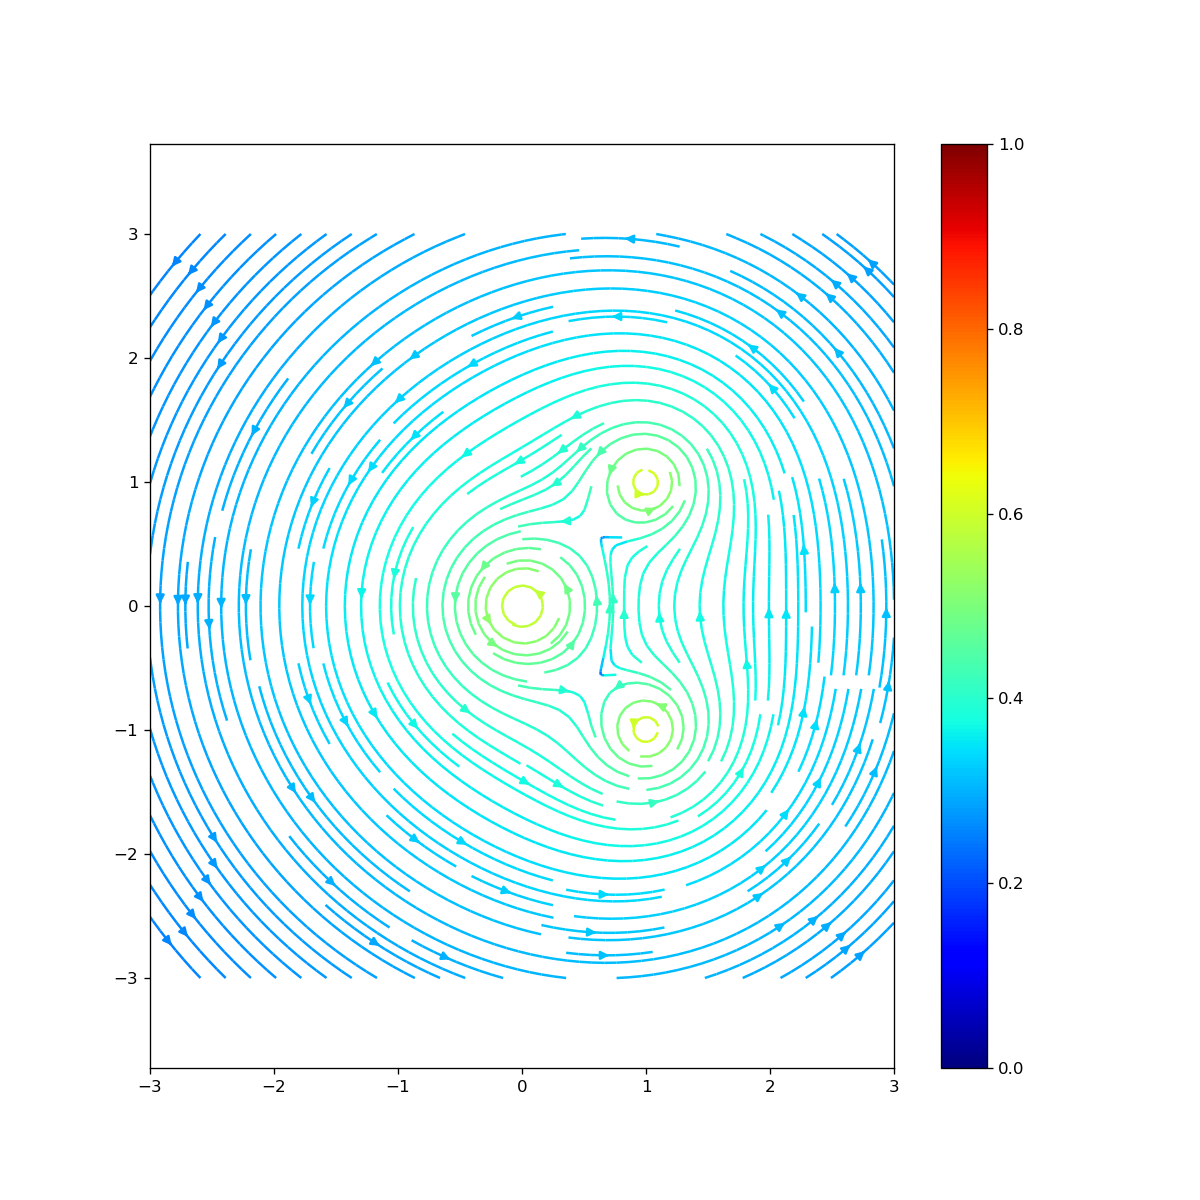

/tmp/ipykernel_52386/1482998293.py:49: RuntimeWarning: divide by zero encountered in log
  field_magnitude = np.log(field_magnitude)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib notebook


class MovingCharge:
    def __init__(self,q,r=[0,0],v=[0,0,10]):
        self.charge = q
        self.pos = np.array(r)
        self.vel = np.array(v)
    def compute_magnetic_field(self,x,y):
        X, Y = np.meshgrid(x, y)
        mod_r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2)
        r = np.array([-(Y-self.pos[1]),(X-self.pos[0])])
        mu = 1
        field = mu*self.charge*self.vel[2]*r/(4*np.pi*mod_r**3)
        return field

def compute_resulting_field(particles, x, y):
    fields = [p.compute_magnetic_field(x, y) for p in particles]
    total_field = np.zeros_like(fields[0])
    for field in fields:
        total_field += field
    return total_field


a = 3

x = np.linspace(-a, a, 1000)
y = np.linspace(-a, a, 1000)


q0 = MovingCharge(-1,[0,0],[0,0,-20])
q1 = MovingCharge(-1,[-1,1],[0,0,-10])
q2 = MovingCharge(-1,[1,1],[0,0,-10])
q3 = MovingCharge(-1,[1,-1],[0,0,-10])
q4 = MovingCharge(-1,[-1,-1],[0,0,-10])

field = compute_resulting_field([q0,q2,q3], x, y)
field = np.nan_to_num(field)


fig = plt.figure(figsize=(10, 10))

# plt.streamplot(x, y, field[0], field[1],arrowsize=1,density=2)

field_magnitude = np.sqrt(field[0]**2+field[1]**2)
field_magnitude = np.log(field_magnitude)
field_magnitude = np.nan_to_num(field_magnitude,neginf=0)

field_min = np.min(field_magnitude)
field_max = np.max(field_magnitude)
field_diff = field_max-field_min
field_magnitude_norm = (field_magnitude-field_min)/field_diff

# print(np.min(field_magnitude_norm))

plt.streamplot(x, y, field[0], field[1],arrowsize=1,color=field_magnitude_norm,cmap='jet',density=2)
plt.colorbar()

plt.axis('equal')
plt.show()

<IPython.core.display.Javascript object>


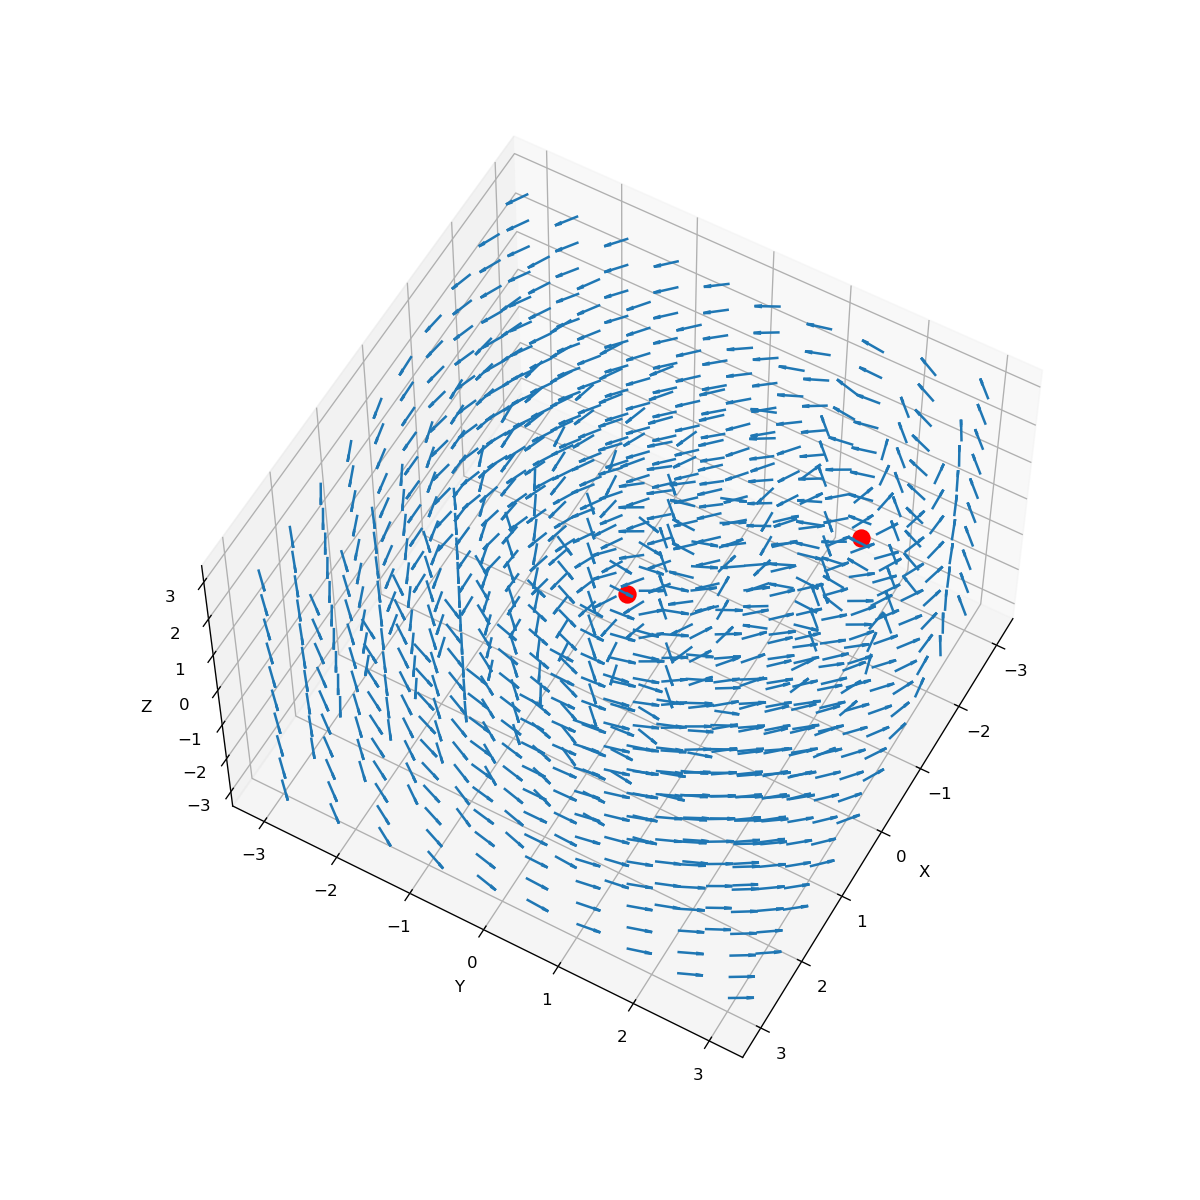

In [3]:
def cross(a,x,y,z):
    Cx = np.zeros_like(x)
    Cy = np.zeros_like(y)
    Cz = np.zeros_like(z)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            for k in range(x.shape[2]):
                b = np.array([x[i,j,k],y[i,j,k],z[i,j,k]])
                c = np.cross(a,b)
                Cx[i,j,k] = c[0]
                Cy[i,j,k] = c[1]
                Cz[i,j,k] = c[2]
    C = np.array([Cx,Cy,Cz])
    return C

class MovingCharge:
    def __init__(self,q,r=[0,0,0],v=[0,0,10]):
        self.charge = q
        self.pos = np.array(r)
        self.vel = np.array(v)
    def compute_magnetic_field(self,x,y,z):
        X, Y, Z = np.meshgrid(x, y, z)
        r = np.array([(X-self.pos[0]),(Y-self.pos[1]),(Z-self.pos[2])])
        mod_r = np.sqrt((X - self.pos[0])**2 + (Y - self.pos[1])**2 + (Z - self.pos[2])**2)
        mu = 1
        
#         v_cross_r = cross(self.vel,r[0,:,:,:],r[1,:,:,:],r[2,:,:,:])
        v_cross_r = cross(self.vel,r[0,:,:,:],r[1,:,:,:],r[2,:,:,:])
        
#         eijk = np.zeros((3, 3, 3))
#         eijk[0, 1, 2] = eijk[1, 2, 0] = eijk[2, 0, 1] = 1
#         eijk[0, 2, 1] = eijk[2, 1, 0] = eijk[1, 0, 2] = -1
#         v_cross_r = np.einsum('ijk,i,jl->ijkl',eijk,v,r)
        
        field = mu*self.charge*v_cross_r/(4*np.pi*mod_r**3)
        return field

def compute_resulting_field(particles, x, y, z):
    fields = [p.compute_magnetic_field(x, y, z) for p in particles]
    total_field = np.zeros_like(fields[0])
    for field in fields:
        total_field += field
    return total_field


a = 3

x = np.linspace(-a, a, 10)
y = np.linspace(-a, a, 10)
z = np.linspace(-a, a, 10)


q0 = MovingCharge(-1,[0,0,0],[0,0,-10])
q1 = MovingCharge(-1,[-2,2,0],[0,0,-10])
q2 = MovingCharge(-1,[2,2,2],[0,0,-10])
q3 = MovingCharge(-1,[2,-2,-2],[0,0,-10])
q4 = MovingCharge(-1,[-2,0,2],[0,0,-10])


charges = [q0,q1]

field = compute_resulting_field(charges, x, y, z)
field = np.nan_to_num(field)


X, Y, Z = np.meshgrid(x, y, z)

U = field[0,:,:,:]
V = field[1,:,:,:]
W = field[2,:,:,:]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(X, Y, Z, U, V, W, length=0.3, normalize=True)

for i in charges:
    ax.scatter(i.pos[0],i.pos[1],i.pos[2],s=100, c='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(azim=0, elev=90)

<IPython.core.display.Javascript object>


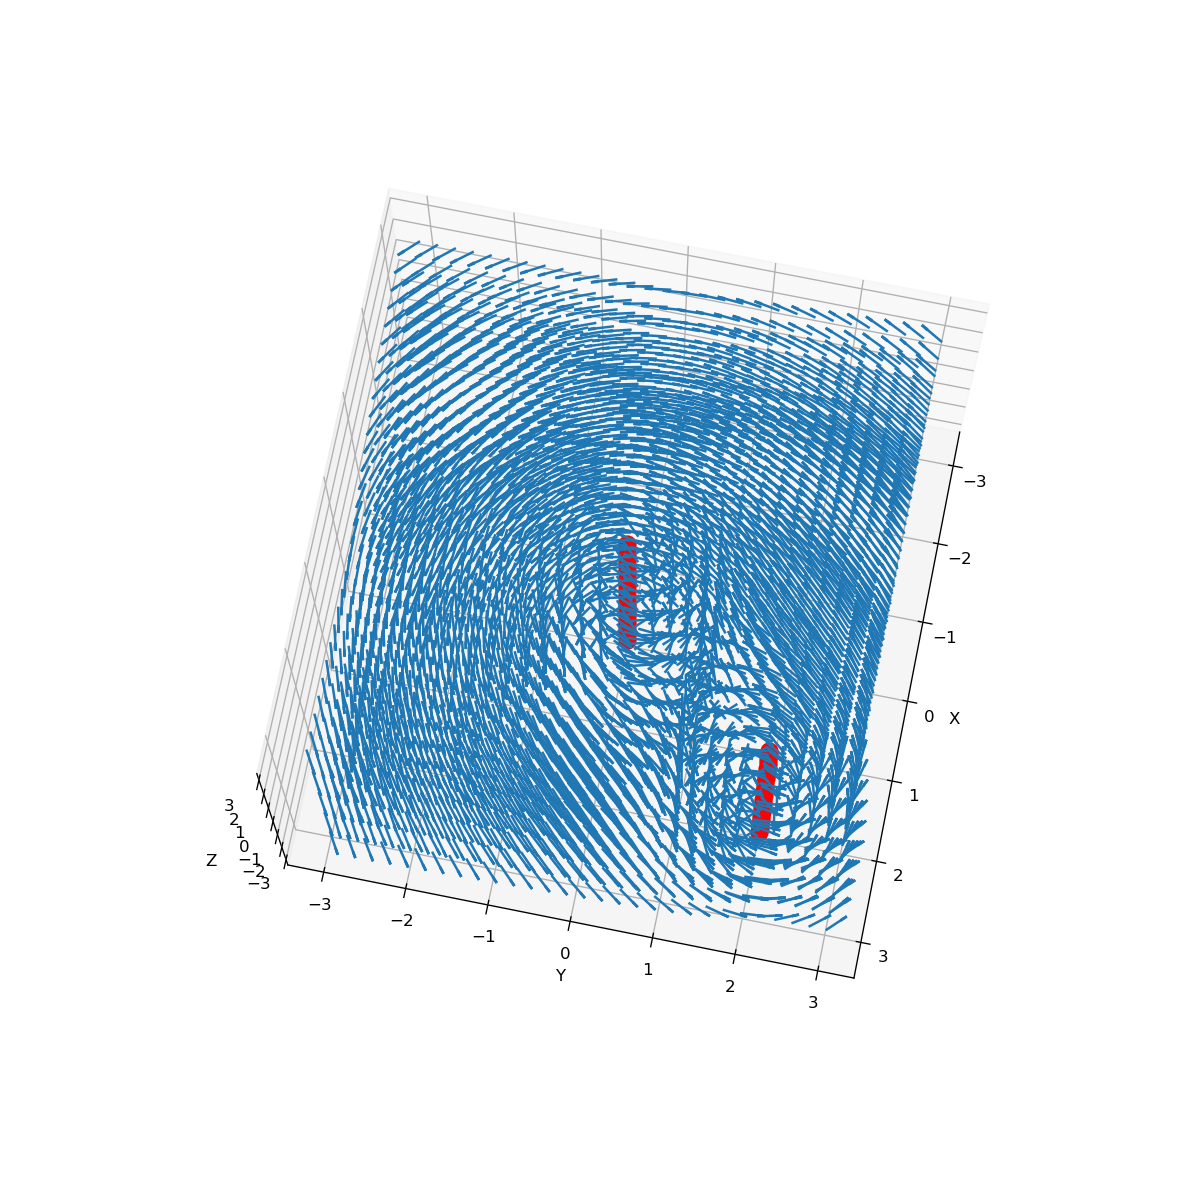

In [4]:
def wire(xy_pos=[0,0]):
    wire = []
    for i in np.linspace(min(z),max(z),20):
        q = MovingCharge(-1,[xy_pos[0],xy_pos[1],i],[0,0,-10])
        wire.append(q)
    return wire


wires = wire([0,0]) + wire([2,2])

x = np.linspace(-a, a, 30)
y = np.linspace(-a, a, 30)
z = np.linspace(-a, a, 5)

field = compute_resulting_field(wires, x, y, z)
field = np.nan_to_num(field)


X, Y, Z = np.meshgrid(x, y, z)

U = field[0,:,:,:]
V = field[1,:,:,:]
W = field[2,:,:,:]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(X, Y, Z, U, V, W, length=0.3, normalize=True)

for i in wires:
    ax.scatter(i.pos[0],i.pos[1],i.pos[2],s=100, c='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(azim=0, elev=90)

<IPython.core.display.Javascript object>


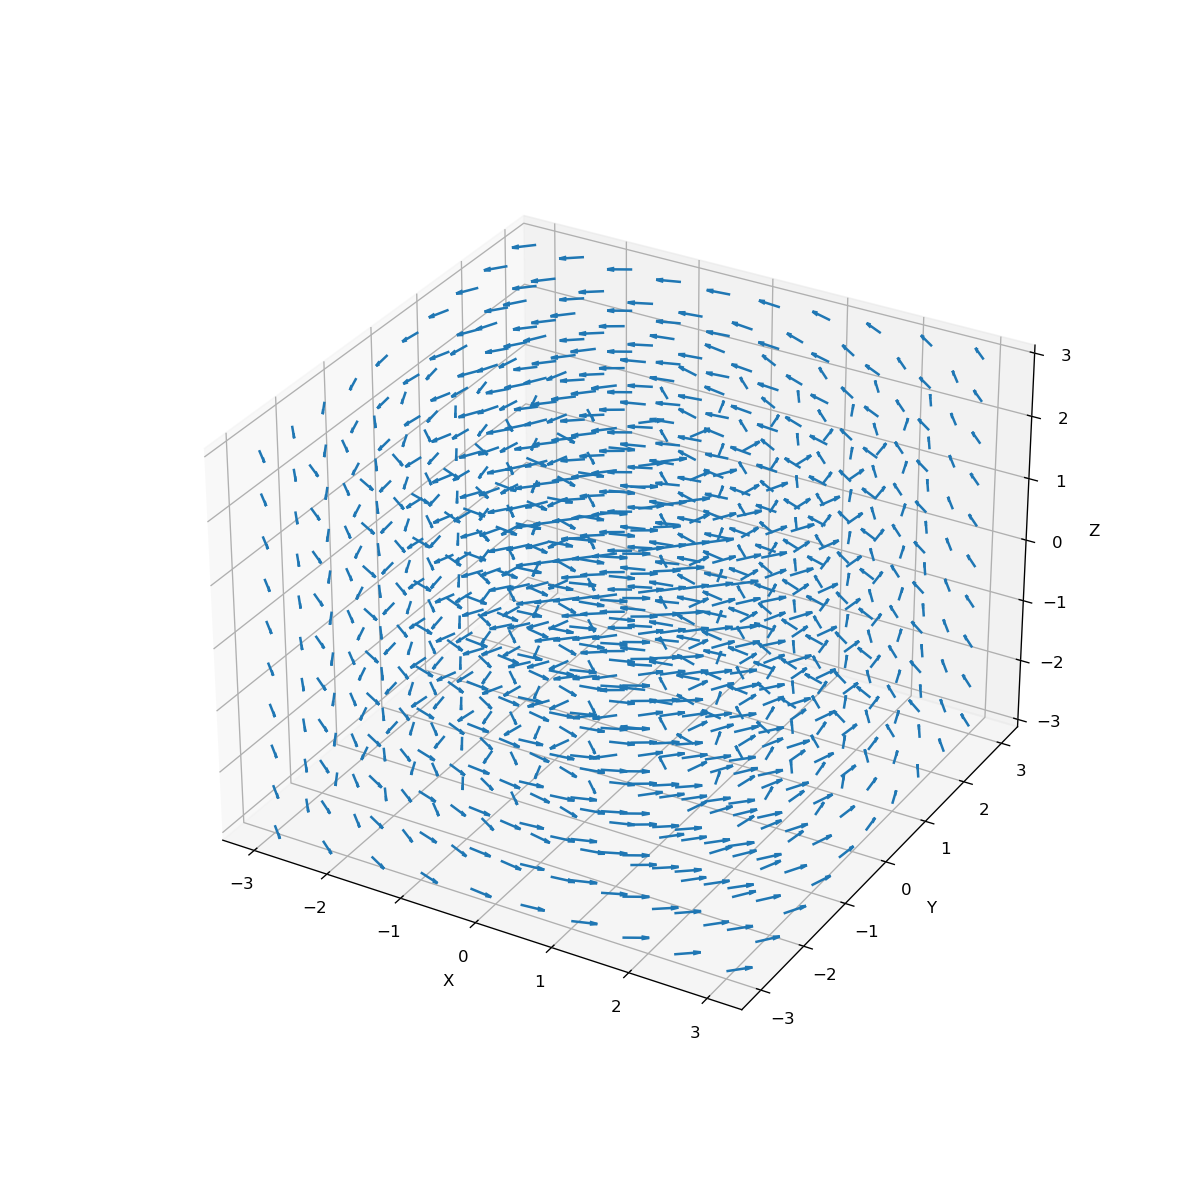

In [5]:
class Wire:
    def __init__(self,I,L_start=[0,0,-3],L_end=[0,0,3]):
        self.current = I
        L = np.array(L_end)-np.array(L_start)
        L_cap = L/np.linalg.norm(L)
        self.direction = L_cap
    def compute_magnetic_field(self,x,y,z):
        X, Y, Z = np.meshgrid(x, y, z)
        r = np.array([X,Y,Z])
        mod_r = np.sqrt(X**2 + Y**2 + Z**2)
        mu = 1
        v_cross_r = cross(self.direction,r[0,:,:,:],r[1,:,:,:],r[2,:,:,:])
        field = mu*self.current*v_cross_r/(2*np.pi*mod_r**2)
        return field

def compute_resulting_field(particles, x, y, z):
    fields = [p.compute_magnetic_field(x, y, z) for p in particles]
    total_field = np.zeros_like(fields[0])
    for field in fields:
        total_field += field
    return total_field


a = 3

x = np.linspace(-a, a, 10)
y = np.linspace(-a, a, 10)
z = np.linspace(-a, a, 10)


q0 = Wire(1,[0,0,-3],[0,0,3])
q1 = Wire(1,[0,2,-3],[0,2,3])


charges = [q0,q1]

field = compute_resulting_field(charges, x, y, z)
field = np.nan_to_num(field)


X, Y, Z = np.meshgrid(x, y, z)

U = field[0,:,:,:]
V = field[1,:,:,:]
W = field[2,:,:,:]


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.quiver(X, Y, Z, U, V, W, length=0.3, normalize=True)

# for i in charges:
#     ax.scatter(i.L[0],i.L[1],i.L[2],s=100, c='r')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()